In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use Pandas to load dataset from csv file
import pandas as pd

In [ ]:
#load the dataset into colab


In [2]:
#load data and put into a file path
import pathlib

data_dir = pathlib.Path(r"C:\Users\felix\Documents\Untitled Folder\dataset")


In [3]:
#count the images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


89


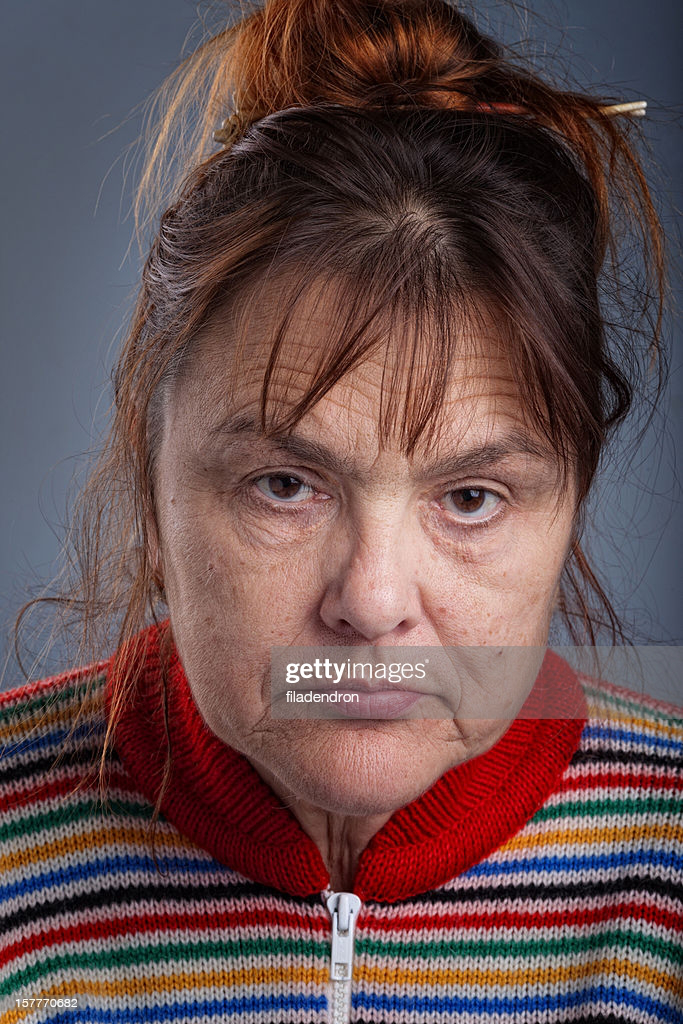

In [4]:
#get an image of the mensche category
menschen = list(data_dir.glob('menschen/*'))
PIL.Image.open(str(menschen[0]))


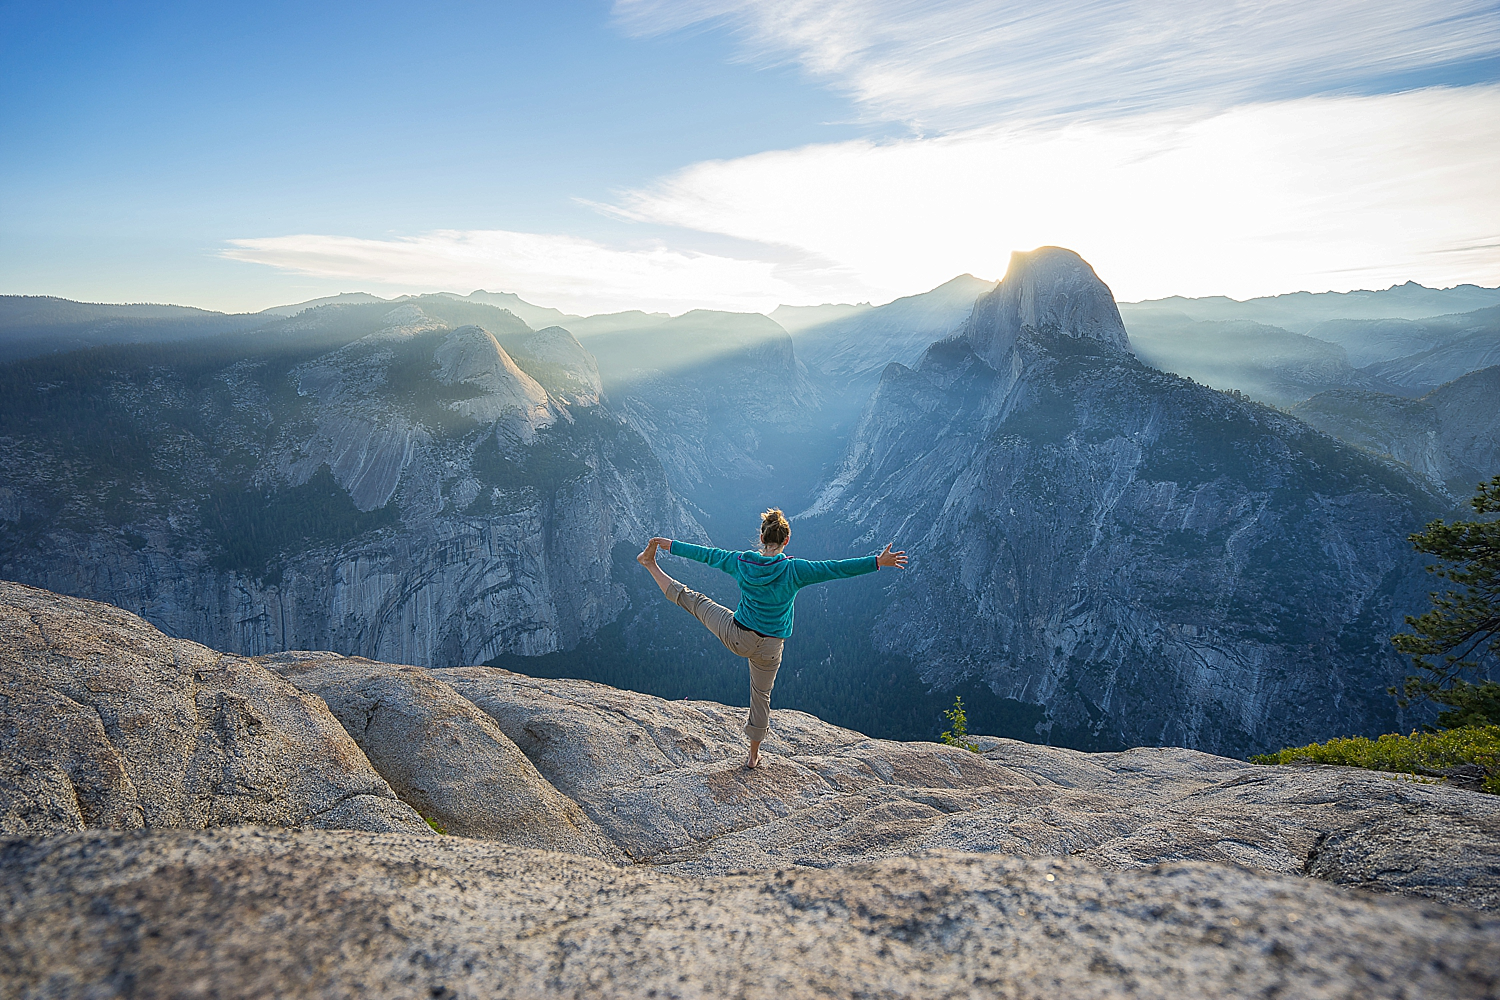

In [5]:
#get an image of the nicht mensch category
nicht_mensch = list(data_dir.glob('natur/*'))
PIL.Image.open(str(nicht_mensch[0]))

In [6]:
#Hyperparameters for the data loader
batch_size = 8
img_height = 360
img_width = 360


In [7]:
#load data for training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 95 files belonging to 2 classes.
Using 76 files for training.


In [8]:
#load data for validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 95 files belonging to 2 classes.
Using 19 files for validation.


In [9]:
#print the class names of the dataset
class_names = train_ds.class_names
print(class_names)


['menschen', 'natur']


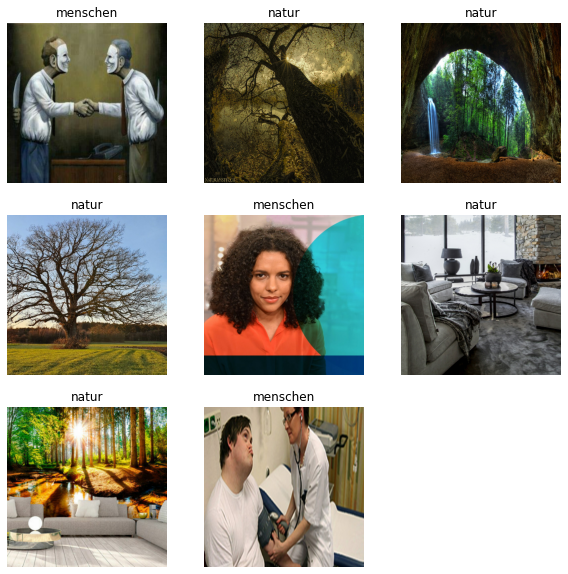

In [10]:
#plot some examples of the train_set
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [11]:
#normalize the data 
# our dimension is 360*360 -1 for the input
# we want values between 0 and 1

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.0)


In [12]:
train_ds

<BatchDataset shapes: ((None, 360, 360, 3), (None,)), types: (tf.float32, tf.int32)>

In [15]:
#check if pixel values are between 0 and 1
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[6]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [17]:
#prepare data for better training perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#add data augmentation
#add regularization l2/drop/BatchNormalization

In [18]:
#create a model with sequential API
#specify num of classes for the last FC layer
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [19]:
#compile the modell
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [20]:
#train the modell and evaluate
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

model.evaluate(
    val_ds,
    batch_size=8
)

Epoch 1/3
10/10 [==============================] - 10s 976ms/step - loss: 1.0646 - accuracy: 0.5658 - val_loss: 0.9238 - val_accuracy: 0.3684
Epoch 2/3
10/10 [==============================] - 8s 815ms/step - loss: 0.6070 - accuracy: 0.6184 - val_loss: 1.0442 - val_accuracy: 0.3684
Epoch 3/3
3/3 [==============================] - 0s 119ms/step - loss: 0.5255 - accuracy: 0.7368


[0.5255070924758911, 0.7368420958518982]